In [1]:
import numpy as np
import pandas as pd

In [2]:
movies= pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies = movies.merge(credits,on='title')

In [6]:
##movies.shape()

In [7]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
movies= movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [9]:
movies.head(5)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [11]:
movies.dropna(inplace=True)

In [12]:
movies.duplicated().sum()

0

In [13]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [14]:
import ast

In [15]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [16]:
movies['genres']=movies['genres'].apply(convert)

In [17]:
movies['keywords']=movies['keywords'].apply(convert)

In [18]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [19]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [20]:
movies['cast']=movies['cast'].apply(convert)

In [21]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [22]:
def fetch_director(obj):
    L= []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [23]:
movies['crew']=movies['crew'].apply(fetch_director)

In [24]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]


In [25]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [26]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [27]:
movies['genres']= movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']= movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']= movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']= movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [28]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]


In [29]:
movies['tags']=movies['overview'] + movies['genres'] + movies['keywords']+movies['cast'] + movies['crew']

In [30]:
new_df = movies[['movie_id','title','tags','crew','genres']]

In [31]:
new_df.head(1)

,movie_id,title,tags,crew,genres
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction]"


In [32]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))
new_df['crew'] = new_df['crew'].apply(lambda x:" ".join(x))
new_df['genres'] = new_df['genres'].apply(lambda x:" ".join(x))

C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/378561758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))
C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/378561758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['crew'] = new_df['crew'].apply(lambda x:" ".join(x))
C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/378561758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [33]:
new_df.head(1)

,movie_id,title,tags,crew,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",JamesCameron,Action Adventure Fantasy ScienceFiction


In [34]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
new_df['crew']= new_df['crew'].apply(lambda x:x.lower())
new_df['genres'] = new_df['genres'].apply(lambda x:x.lower())

C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/2319381408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())
C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/2319381408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['crew']= new_df['crew'].apply(lambda x:x.lower())
C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/2319381408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [35]:
new_df.head(5)

,movie_id,title,tags,crew,genres
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di...",jamescameron,action adventure fantasy sciencefiction
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",goreverbinski,adventure fantasy action
2,206647,Spectre,a cryptic message from bond’s past sends him o...,sammendes,action adventure crime
3,49026,The Dark Knight Rises,following the death of district attorney harve...,christophernolan,action crime drama thriller
4,49529,John Carter,"john carter is a war-weary, former military ca...",andrewstanton,action adventure sciencefiction


In [36]:
import nltk

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [39]:
new_df['tags']=new_df['tags'].apply(stem)
#new_df['crew']=new_df['crew'].apply(stem)
#new_df['genres']=new_df['genres'].apply(stem)

C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/384117118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [40]:
new_df.head()

,movie_id,title,tags,crew,genres
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 5000, stop_words='english')
cv1  = CountVectorizer(max_features= 5000, stop_words='english')
cv2= CountVectorizer(max_features= 5000, stop_words='english')

In [42]:
vectors =  cv.fit_transform(new_df['tags']).toarray()
vs =  cv1.fit_transform(new_df['crew']).toarray()
vg= cv2.fit_transform(new_df['genres']).toarray()

In [43]:
!pip install scikit_learn

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [44]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
vectors[0]
vs[0]
vg[0]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [46]:
print(cv.get_feature_names_out(5))
print(cv1.get_feature_names_out(5))
print(cv2.get_feature_names_out(5))

['000' '007' '10' ... 'zoo' 'zooeydeschanel' 'zoëkravitz']
['aaronhann' 'aaronschneider' 'abelferrara' ... 'émilegaudreault'
 'érictessier' 'étiennefaure']
['action' 'adventure' 'animation' 'comedy' 'crime' 'documentary' 'drama'
 'family' 'fantasy' 'foreign' 'history' 'horror' 'music' 'mystery'
 'romance' 'sciencefiction' 'thriller' 'tvmovie' 'war' 'western']


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
similarity = cosine_similarity(vectors)
similarity2= cosine_similarity(vs)
similarity3= cosine_similarity(vg)

In [49]:
similarity[0]
similarity2[0]
similarity3[0]

array([1.        , 0.8660254 , 0.57735027, ..., 0.        , 0.        ,
       0.        ])

In [50]:
def recommend(movie):
    movie_index = new_df[new_df['title']== movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)


In [51]:
def recommend2(movie):
    movie_index2 = new_df[new_df['crew']== movie].index[0]
    distances2=similarity2[movie_index2]
    movies_list2=sorted(list(enumerate(distances2)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list2:
        print(new_df.iloc[i[0]].title) 

In [52]:
def recommend3(movie):
    movie_index3 = new_df[new_df['genres']== movie].index[1]
    distances3=similarity3[movie_index3]
    movies_list3=sorted(list(enumerate(distances3)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list3:
        print(new_df.iloc[i[0]].title)

In [53]:
recommend('Avatar')

Aliens vs Predator: Requiem
Predator
Battle: Los Angeles
Falcon Rising
Independence Day


In [54]:
recommend2('jamescameron')

Titanic
Terminator 2: Judgment Day
True Lies
The Abyss
Aliens


In [55]:
recommend3('action')

Stealth
Driven
Maze Runner: The Scorch Trials
State of Play
The Bounty Hunter


In [56]:
import pickle

In [57]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [58]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [59]:
new_df['crew'].values

array(['jamescameron', 'goreverbinski', 'sammendes', ..., 'scottsmith',
       'danielhsia', 'brianherzlinger'], dtype=object)

In [60]:
new_df['genres'].values

array(['action adventure fantasy sciencefiction',
       'adventure fantasy action', 'action adventure crime', ...,
       'comedy drama romance tvmovie', '', 'documentary'], dtype=object)

In [61]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [62]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [63]:
pickle.dump(similarity2,open('similarity2.pkl','wb'))

In [64]:
pickle.dump(similarity2,open('similarity3.pkl','wb'))

In [65]:
import nltk

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [67]:
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [68]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [69]:
new_df.head()

,movie_id,title,tags,crew,genres
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction


In [70]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [71]:
import matplotlib.pyplot as plt

In [72]:
!pip install langdetect

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [73]:
import langdetect

In [74]:
txt = new_df["tags"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniay jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywilso

In [75]:
new_df['lang'] =  new_df["tags"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
new_df.head()

C:\Users\Pradnya\AppData\Local\Temp/ipykernel_20472/2795756902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['lang'] =  new_df["tags"].apply(lambda x: langdetect.detect(x) if


,movie_id,title,tags,crew,genres,lang
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction,en
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action,en
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime,en
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller,en
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction,en


In [76]:
new_df = new_df[new_df["lang"]=="en"]

In [77]:
import re

In [78]:
print("--- original ---")
print(txt)
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)
print("--- tokenization ---")
txt = txt.split()
print(txt)

--- original ---
in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniay jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain 

In [79]:
import nltk

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradnya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [82]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

--- remove stopwords ---
['22nd', 'century', 'parapleg', 'marin', 'dispatch', 'moon', 'pandora', 'uniqu', 'mission', 'becom', 'torn', 'follow', 'order', 'protect', 'alien', 'civilization', 'action', 'adventur', 'fantasi', 'sciencefict', 'cultureclash', 'futur', 'spacewar', 'spacecoloni', 'societi', 'spacetravel', 'futurist', 'romanc', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marin', 'soldier', 'battl', 'loveaffair', 'antiwar', 'powerrel', 'mindandsoul', '3d', 'samworthington', 'zoesaldana', 'sigourneyweav', 'stephenlang', 'michellerodriguez', 'giovanniribisi', 'joeldavidmoor', 'cchpounder', 'wesstudi', 'lazalonso', 'dileeprao', 'mattgerald', 'seananthonymoran', 'jasonwhyt', 'scottlawr', 'kellykilgour', 'jamespatrickpitt', 'seanpatrickmurphi', 'peterdillon', 'kevindorman', 'kelsonhenderson', 'davidvanhorn', 'jacobtomuri', 'michaelblainrozgay', 'joncurri', 'lukehawk', 'woodyschultz', 'petermensah', 'soniay', 'jahnelcurfman', 'ilramchoi', 'kylawarren', 'lisaroumain', 'debrawilson

In [83]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [84]:
!pip install TextBlob

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [85]:
!pip install spacy

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [86]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\pradnya\appdata\local\programs\python\python39\lib\site-packages (4.3.1)


You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [87]:
import wordcloud
from textblob import TextBlob
## for name entity recognition
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
##import gensim.downloader as gensim_api
## for topic modeling
##import gensim

In [88]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pradnya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pradnya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

--- stemming ---
['22nd', 'centuri', 'parapleg', 'marin', 'dispatch', 'moon', 'pandora', 'uniqu', 'mission', 'becom', 'torn', 'follow', 'order', 'protect', 'alien', 'civil', 'action', 'adventur', 'fantasi', 'sciencefict', 'cultureclash', 'futur', 'spacewar', 'spacecoloni', 'societi', 'spacetravel', 'futurist', 'romanc', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marin', 'soldier', 'battl', 'loveaffair', 'antiwar', 'powerrel', 'mindandsoul', '3d', 'samworthington', 'zoesaldana', 'sigourneyweav', 'stephenlang', 'michellerodriguez', 'giovanniribisi', 'joeldavidmoor', 'cchpounder', 'wesstudi', 'lazalonso', 'dileeprao', 'mattgerald', 'seananthonymoran', 'jasonwhyt', 'scottlawr', 'kellykilgour', 'jamespatrickpitt', 'seanpatrickmurphi', 'peterdillon', 'kevindorman', 'kelsonhenderson', 'davidvanhorn', 'jacobtomuri', 'michaelblainrozgay', 'joncurri', 'lukehawk', 'woodyschultz', 'petermensah', 'soniay', 'jahnelcurfman', 'ilramchoi', 'kylawarren', 'lisaroumain', 'debrawilson', 'chrismala',

In [90]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, lst_stopwords=None, flg_stemm=False, flg_lemm=True):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [91]:
new_df["text_clean"] = new_df["tags"].apply(lambda x: utils_preprocess_text(x, lst_stopwords, flg_stemm=False, flg_lemm=True))

In [92]:
new_df.head()

,movie_id,title,tags,crew,genres,lang,text_clean
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction,en,22nd century parapleg marin dispatch moon pand...
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action,en,captain barbossa long believ dead ha come back...
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime,en,cryptic messag bond past send trail uncov sini...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller,en,follow death district attorney harvey dent bat...
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction,en,john carter warweary former militari captain i...


In [93]:
print(new_df["tags"].iloc[0], " --> ", new_df["text_clean"].iloc[0])

in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniay jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywilso

In [94]:
new_df['word_count'] = new_df["tags"].apply(lambda x: len(str(x).split(" ")))
new_df['char_count'] = new_df["tags"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
new_df['sentence_count'] = new_df["tags"].apply(lambda x: len(str(x).split(".")))
new_df['avg_word_length'] = new_df['char_count'] / new_df['word_count']
new_df['avg_sentence_lenght'] = new_df['word_count'] / new_df['sentence_count']
new_df.head()

,movie_id,title,tags,crew,genres,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction,en,22nd century parapleg marin dispatch moon pand...,137,1306,6,9.532847,22.833333
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action,en,captain barbossa long believ dead ha come back...,88,723,4,8.215909,22.000000
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime,en,cryptic messag bond past send trail uncov sini...,135,1298,3,9.614815,45.000000
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller,en,follow death district attorney harvey dent bat...,249,2368,6,9.510040,41.500000
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction,en,john carter warweary former militari captain i...,102,751,3,7.362745,34.000000


In [95]:
!pip install seaborn
import seaborn as sns

You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [96]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 5000, stop_words='english')

In [97]:
new_df["sentiment"] = new_df["tags"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
new_df.head()

,movie_id,title,tags,crew,genres,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction,en,22nd century parapleg marin dispatch moon pand...,137,1306,6,9.532847,22.833333,-0.133333
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action,en,captain barbossa long believ dead ha come back...,88,723,4,8.215909,22.000000,-0.037500
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime,en,cryptic messag bond past send trail uncov sini...,135,1298,3,9.614815,45.000000,-0.141667
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller,en,follow death district attorney harvey dent bat...,249,2368,6,9.510040,41.500000,-0.042727
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction,en,john carter warweary former militari captain i...,102,751,3,7.362745,34.000000,-0.010000


In [98]:
!pip install spacy.cli

ERROR: Could not find a version that satisfies the requirement spacy.cli (from versions: none)
ERROR: No matching distribution found for spacy.cli
You should consider upgrading via the 'c:\users\pradnya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [99]:
import spacy.cli ## common line interface
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [100]:
## call model
import spacy
ner = spacy.load("en_core_web_lg")
## tag text
txt = new_df["tags"].iloc[3]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [101]:
##!pip install collections
import collections

In [102]:
## tag text and exctract tags into a list
new_df["tagss"] = new_df["tags"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
new_df["tagss"] = new_df["tagss"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in new_df["tagss"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     new_df["tagss_"+feature] = new_df["tagss"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
new_df.head()

,movie_id,title,tags,crew,genres,lang,text_clean,word_count,char_count,sentence_count,...,tagss_LOC,tagss_PERSON,tagss_FAC,tagss_ORDINAL,tagss_TIME,tagss_DATE,tagss_WORK_OF_ART,tagss_ORG,tagss_LANGUAGE,tagss_EVENT
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",jamescameron,action adventure fantasy sciencefiction,en,22nd century parapleg marin dispatch moon pand...,137,1306,6,...,1,16,0,0,0,1,0,7,0,0
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",goreverbinski,adventure fantasy action,en,captain barbossa long believ dead ha come back...,88,723,4,...,0,9,0,0,0,0,0,5,0,0
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,sammendes,action adventure crime,en,cryptic messag bond past send trail uncov sini...,135,1298,3,...,0,18,0,0,0,0,0,9,0,0
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,christophernolan,action crime drama thriller,en,follow death district attorney harvey dent bat...,249,2368,6,...,0,27,0,0,0,1,0,12,0,0
4,49529,John Carter,"john carter is a war-weary, former militari ca...",andrewstanton,action adventure sciencefiction,en,john carter warweary former militari captain i...,102,751,3,...,0,6,0,0,0,0,0,5,0,0


In [103]:
## predict wit NER
txt = new_df["tags"].iloc[0]
print(txt)
entities = ner(txt).ents
print(entities)
## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
## show result
print(tagged_txt)

in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniay jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywilso

In [104]:
import nltk
nltk.download('punkt')
tags = "Avatar"
corpus = new_df[new_df["tags"]==tags]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pradnya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
lst_words = ["quality", "nice", "good"]
## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(new_df["text_clean"]).todense(), columns=lst_words)
## add the new features as columns
new_df = pd.concat([new_df, dtf_X.set_index(new_df.index)], axis=1)
new_df.sample(10)

,movie_id,title,tags,crew,genres,lang,text_clean,word_count,char_count,sentence_count,...,tagss_ORDINAL,tagss_TIME,tagss_DATE,tagss_WORK_OF_ART,tagss_ORG,tagss_LANGUAGE,tagss_EVENT,quality,nice,good
3747,27191,The Greatest Show on Earth,"to ensur a full profit season, circu manag bra...",cecilb.demille,action drama romance,en,ensur full profit season circu manag brad brad...,83,634,5,...,0,0,0,0,0,0,0,0,0,0
129,10195,Thor,"against hi father odin' will, the mighti thor ...",kennethbranagh,adventure fantasy action,en,hi father odin mighti thor power arrog warrior...,115,820,6,...,0,0,0,0,5,0,0,0,0,0
2733,801,"Good Morning, Vietnam",radio funni man adrian cronauer is sent to vie...,barrylevinson,comedy drama war,en,radio funni man adrian cronauer sent vietnam b...,105,669,10,...,1,0,0,0,6,0,0,0,0,0
3253,16471,Modern Problems,"jealous, harri air traffic control max fielder...",kenshapiro,comedy,en,jealous harri air traffic control max fielder ...,53,324,2,...,0,0,0,0,2,0,0,0,0,0
4040,76706,Christmas Mail,"in thi holiday romant comedy, a mysteri woman ...",johnmurlowski,comedy family,en,thi holiday romant comedy mysteri woman work p...,36,233,3,...,0,0,0,0,1,0,0,0,0,0
2694,12403,A Perfect Getaway,"for their honeymoon, newlyw cliff and cydney h...",davidtwohy,thriller mystery adventure,en,honeymoon newlyw cliff cydney head tropic isla...,106,639,4,...,0,0,0,0,5,0,0,0,0,0
181,9502,Kung Fu Panda,"when the valley of peac is threatened, lazi po...",markosborne,adventure animation family comedy,en,valley peac threatened lazi po panda discov hi...,114,725,3,...,0,0,0,0,5,0,0,0,0,0
3262,1359,American Psycho,a wealthi new york invest bank execut hide hi ...,maryharron,thriller drama crime,en,wealthi new york invest bank execut hide hi al...,58,476,3,...,0,0,0,0,0,0,0,0,0,0
2816,2105,American Pie,"at a high-school party, four friend find that ...",chrisweitz,comedy romance,en,highschool party four friend find lose collect...,105,837,5,...,0,0,0,0,3,0,0,0,0,0
2365,11644,Blow Out,jack terri is a master sound recordist who wor...,briandepalma,drama mystery thriller,en,jack terri master sound recordist work gradeb ...,108,626,6,...,0,1,0,0,0,0,0,0,0,0


In [106]:
import nltk.corpus as corpus

In [107]:
new_df['tags'].astype(str)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4803    el mariachi just want to play hi guitar and ca...
4804    a newlyw couple' honeymoon is upend by the arr...
4805    "signed, sealed, delivered" introduc a dedic q...
4806    when ambiti new york attorney sam is sent to s...
4807    ever sinc the second grade when he first saw h...
Name: tags, Length: 4781, dtype: object

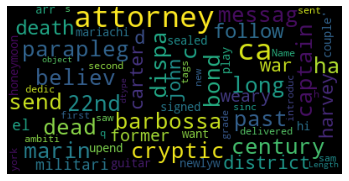

In [108]:
wc = wordcloud.WordCloud(background_color='black', max_words=150, 
                         max_font_size=35)
wc = wc.generate(str(new_df['tags']))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()